# PHÂN TÍCH KHÁM PHÁ DỮ LIỆU

### 1. Nhập các thư viện cần thiết

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Đảm bảo rằng các hình ảnh hiển thị rõ ràng
%matplotlib inline
sns.set(style="whitegrid")

### 2. Đọc dữ liệu

In [10]:
# Đường dẫn tới dữ liệu thô
data_path = "../data/raw/creditcard.csv"
df = pd.read_csv(data_path)


### 3. Tổng quan dữ liệu

In [11]:
print("Kích thước của dataset:", df.shape)
print("\nThông tin chi tiết về dataset:")
df.info()


print("\nXem qua 5 dòng đầu tiên của dataset:")
df.head()

Kích thước của dataset: (284807, 31)

Thông tin chi tiết về dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 no

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Highlights

1. **Kích thước dữ liệu**:  
   - Tập dữ liệu chứa **284,807 giao dịch** với **31 cột đặc trưng**.  

2. **Kiểu dữ liệu**:  
   - Tất cả các cột là kiểu `float64`, ngoại trừ **Class** (kiểu số nguyên).  

3. **Đặc trưng ẩn danh**:  
   - 28 cột (`V1`, `V2`, ..., `V28`) là các đặc trưng đã được giảm chiều bằng PCA.  
   - Các giá trị trong những cột này không mang ý nghĩa logic trực tiếp.

4. **Các cột quan trọng**:  
   - **TIME**, **AMOUNT**, và **CLASS** là những cột có thể phân tích sâu.

---


### 4. Thống kê mô tả

In [19]:
print("\nThống kê mô tả các đặc trưng liên tục:")
print(df[['Time','Amount']].describe())


Thống kê mô tả các đặc trưng liên tục:
                Time         Amount
count  284807.000000  284807.000000
mean    94813.859575      88.349619
std     47488.145955     250.120109
min         0.000000       0.000000
25%     54201.500000       5.600000
50%     84692.000000      22.000000
75%    139320.500000      77.165000
max    172792.000000   25691.160000


#### Highlights
Thời gian (Time): Thời gian giao dịch dao động từ 0 đến ~48 giờ, với thời điểm trung bình ~26 giờ.  
Số tiền (Amount): 75% các giao dịch dưới 77.17 đơn vị tiền tệ, nhưng có giao dịch cao nhất lên đến 25,691.16.
Chỉ ra phần lớn giao dịch có giá trị nhỏ, trong khi các giao dịch có giá trị lớn có thể cần chú ý đặc biệt vì khả năng liên quan đến gian lận cao hơn.

In [13]:
# 4.1 Kiểm tra giá trị thiếu
print("\nKiểm tra các giá trị thiếu trong tập dữ liệu:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Kiểm tra các giá trị thiếu trong tập dữ liệu:
Series([], dtype: int64)


Dữ liệu không có giá trị thiếu, đảm bảo tính toàn vẹn của phân tích.

In [14]:
# 4.2 Tóm tắt thông tin chính
print("\nSố lượng giá trị duy nhất trong từng cột:")
print(df.nunique())


Số lượng giá trị duy nhất trong từng cột:
Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


### 5. Phân phối dữ liệu

#### 5.1. Phân tích nhãn (class)


Phân phối nhãn (Class):
Class
0    284315
1       492
Name: count, dtype: int64


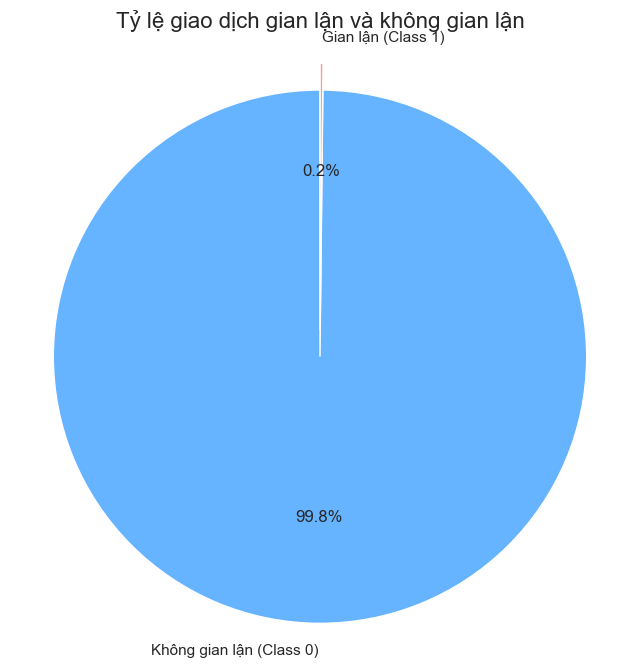

In [15]:
# Tần suất của các nhãn (Class)
class_counts = df['Class'].value_counts()
print("\nPhân phối nhãn (Class):")
print(class_counts)

# Vẽ biểu đồ hình tròn thể hiện tỷ lệ các nhãn
labels = ['Không gian lận (Class 0)', 'Gian lận (Class 1)']
sizes = [class_counts[0], class_counts[1]]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title("Tỷ lệ giao dịch gian lận và không gian lận", fontsize=16)
plt.axis('equal')  # Đảm bảo hình tròn hoàn chỉnh
plt.show()

#### Highlights 
Bộ dữ liệu này có 492 vụ gian lận trong số 284315 giao dịch.  
Tập dữ liệu có tính mất cân bằng cao, tỷ lệ gian lận chiếm xấp xỉ 0,2% tổng số giao dịch. Hầu hết các giao dịch đều không gian lận.

#### 5.2. Phân phối thời gian giao dịch (Time)

/var/folders/rz/mr63129s7vs6092h_t0czm140000gn/T/ipykernel_1141/2497283674.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], bins=50)


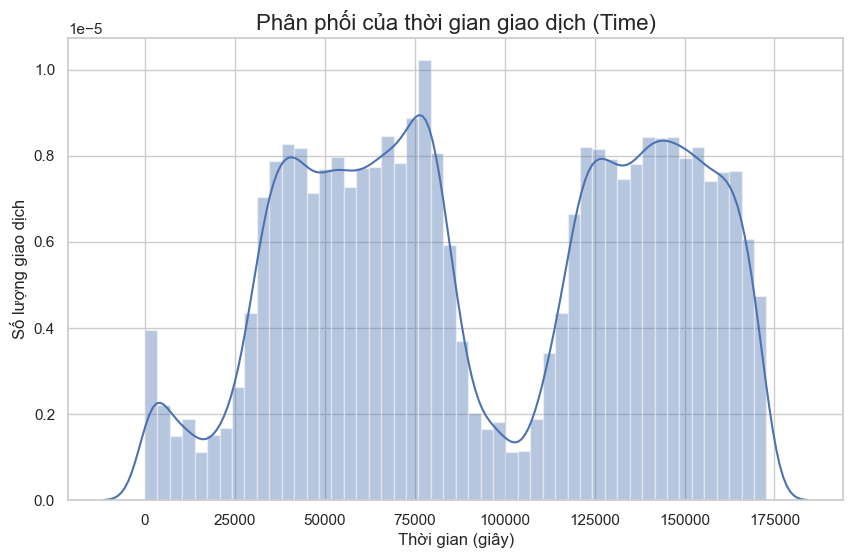

/var/folders/rz/mr63129s7vs6092h_t0czm140000gn/T/ipykernel_1141/2497283674.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], bins=100)


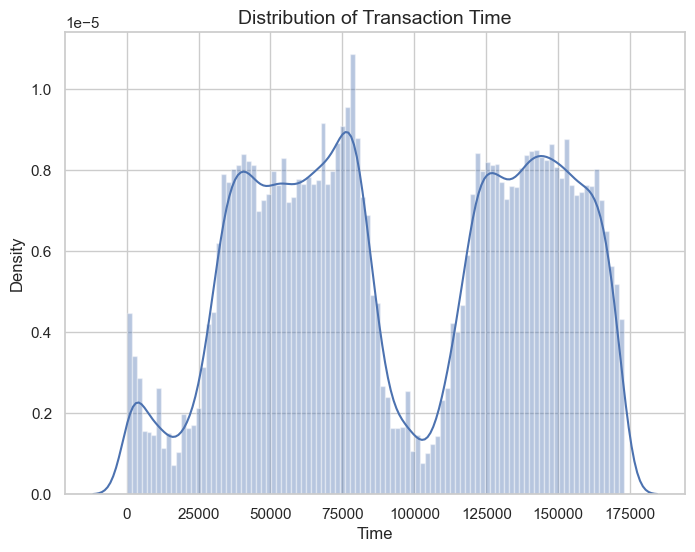

In [24]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Time'], bins=50)
plt.title("Phân phối của thời gian giao dịch (Time)", fontsize=16)
plt.xlabel("Thời gian (giây)", fontsize=12)
plt.ylabel("Số lượng giao dịch", fontsize=12)
plt.show()

#### Highlights

Biểu đồ cho thấy có hai đỉnh trong biểu đồ và có một số đỉnh cục bộ.  
Chúng ta có thể coi đây là thời gian trong ngày, cao điểm là thời điểm ban ngày và độ sâu là thời gian ban đêm.

### 5.3. Phân phối số tiền giao dịch (Amount)

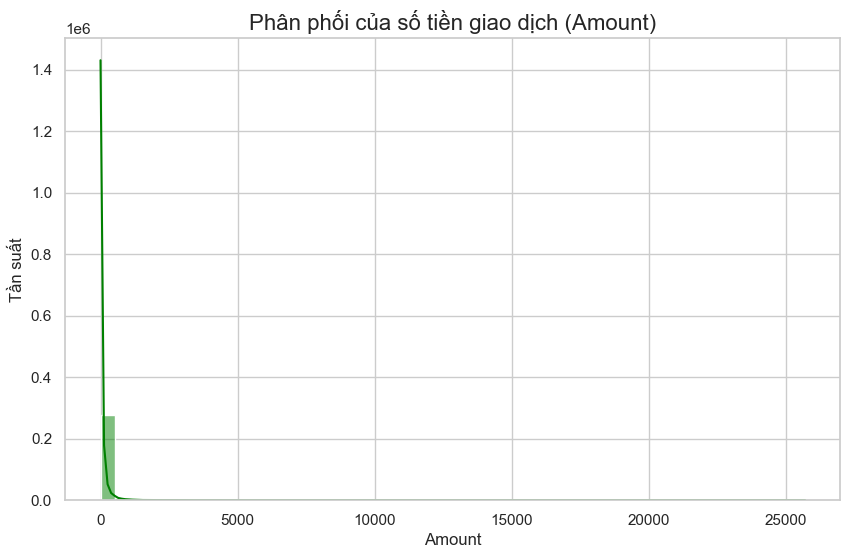

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color="green")
plt.title("Phân phối của số tiền giao dịch (Amount)", fontsize=16)
plt.xlabel("Amount", fontsize=12)
plt.ylabel("Tần suất", fontsize=12)
plt.show()

#### Highlights  
Hầu hết số tiền giao dịch nằm trong khoảng từ 0 đến khoảng 3000 và có một số ngoại lệ cho các giao dịch số lượng thực sự lớn.


### 6. Phân tích ngoại lai (Outliers)

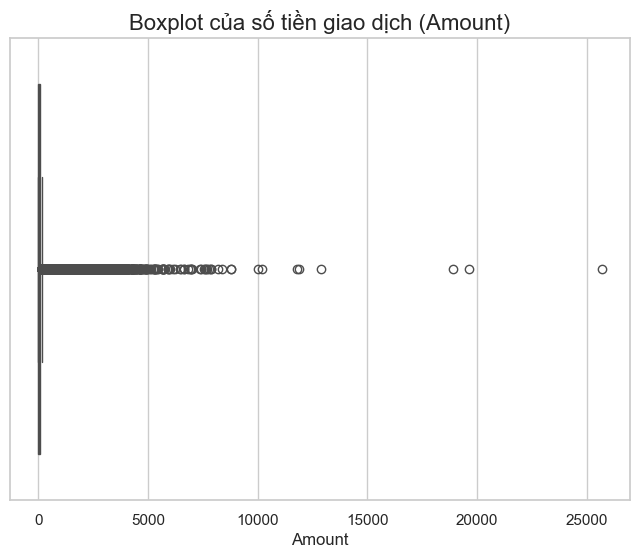

In [35]:
# Vẽ boxplot để trực quan hóa ngoại lai trên Amount
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Amount'], color="orange")
plt.title("Boxplot của số tiền giao dịch (Amount)", fontsize=16)
plt.xlabel("Amount", fontsize=12)
plt.show()

#### Highlights
Có một số ngoại lệ cho các giao dịch số lượng thực sự lớn và việc loại bỏ các ngoại lệ đó trong phân tích có thể gây ảnh hưởng đến mô hình sau này. Vậy nên, chúng ta phải kiểm tra những ngoại lệ này không phải là giao dịch gian lận hay không. Nói chung, các giao dịch gian lận với số tiền rất lớn và việc xóa chúng khỏi dữ liệu có thể khiến mô hình dự đoán trở nên sai lầm.

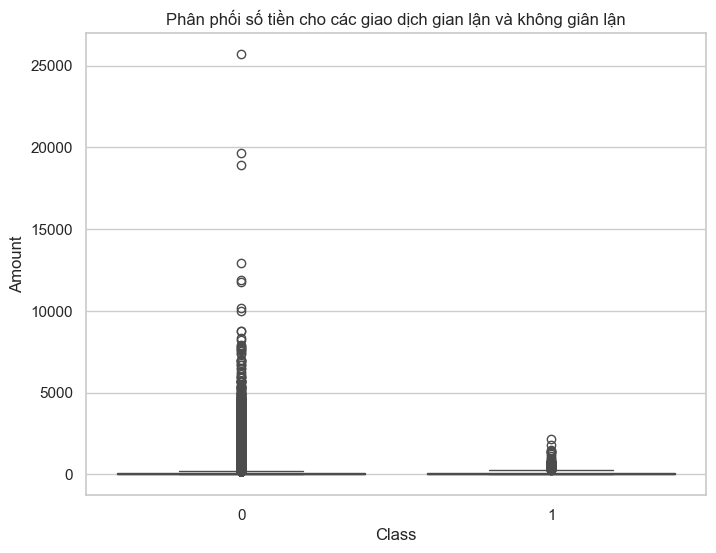

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Class', y='Amount',data = df)
plt.title('Phân phối số tiền cho các giao dịch gian lận và không giân lận')
plt.show()

#### Highlight
Theo biểu đồ trên, về cơ bản có thể thấy giao dịch gian lận không bị ảnh hưởng bởi các giá trị ngoại lệ, vậy nên xây dựng một mô hình dự đoán giao dịch là gian lận mà không bị ảnh hưởng. Có thể không tốt khi mô hình được huấn luyện dựa trên những giá trị ngoại lệ này.

### 7. Phân loại biến

In [37]:
categorical_features = ['Class']
continuous_features = [col for col in df.columns if col not in categorical_features and col != 'Time']

print("\nCác đặc trưng phân loại:", categorical_features)
print("Các đặc trưng liên tục:", continuous_features)


Các đặc trưng phân loại: ['Class']
Các đặc trưng liên tục: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


### 8. Phân tích tương quan

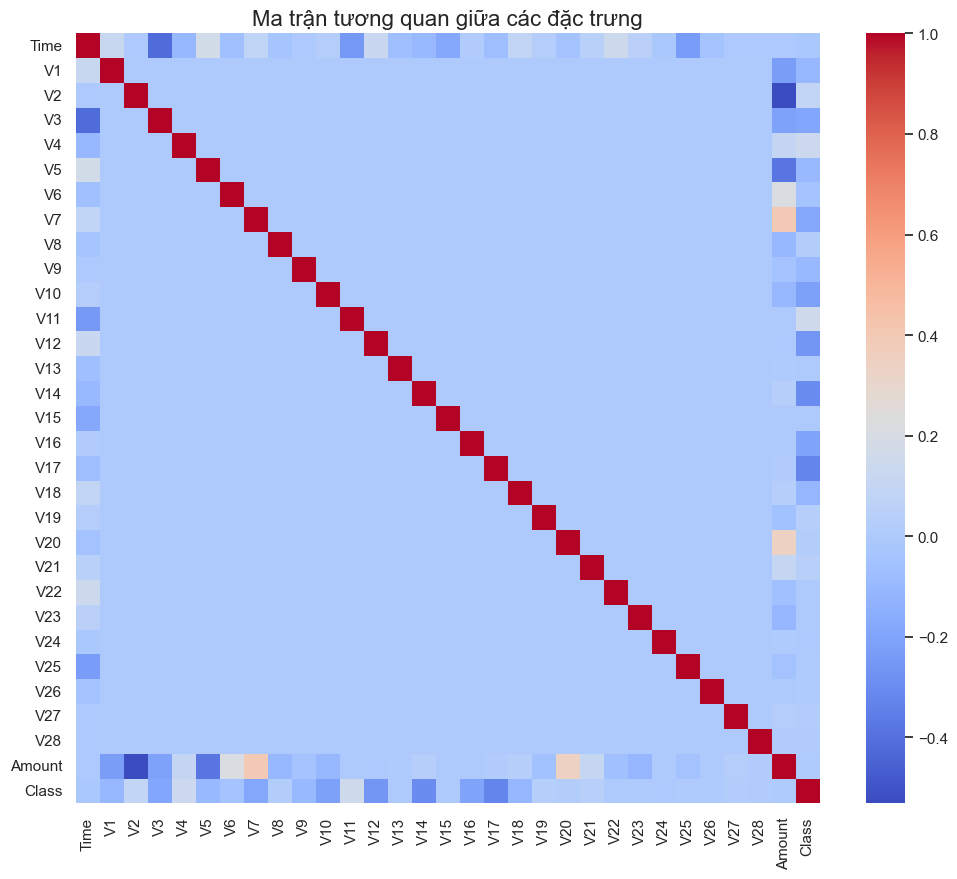

In [38]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Ma trận tương quan giữa các đặc trưng", fontsize=16)
plt.show()

#### Highlights 
Ma trận tương quan cho thấy các mối quan hệ giữa các đặc trưng.  
Amount và Class có tương quan rất nhỏ. V2, V4, V11 cũng có mối tương quan với Class.

### 9. Phân phối các đặc trưng ẩn danh (V1 - V28)

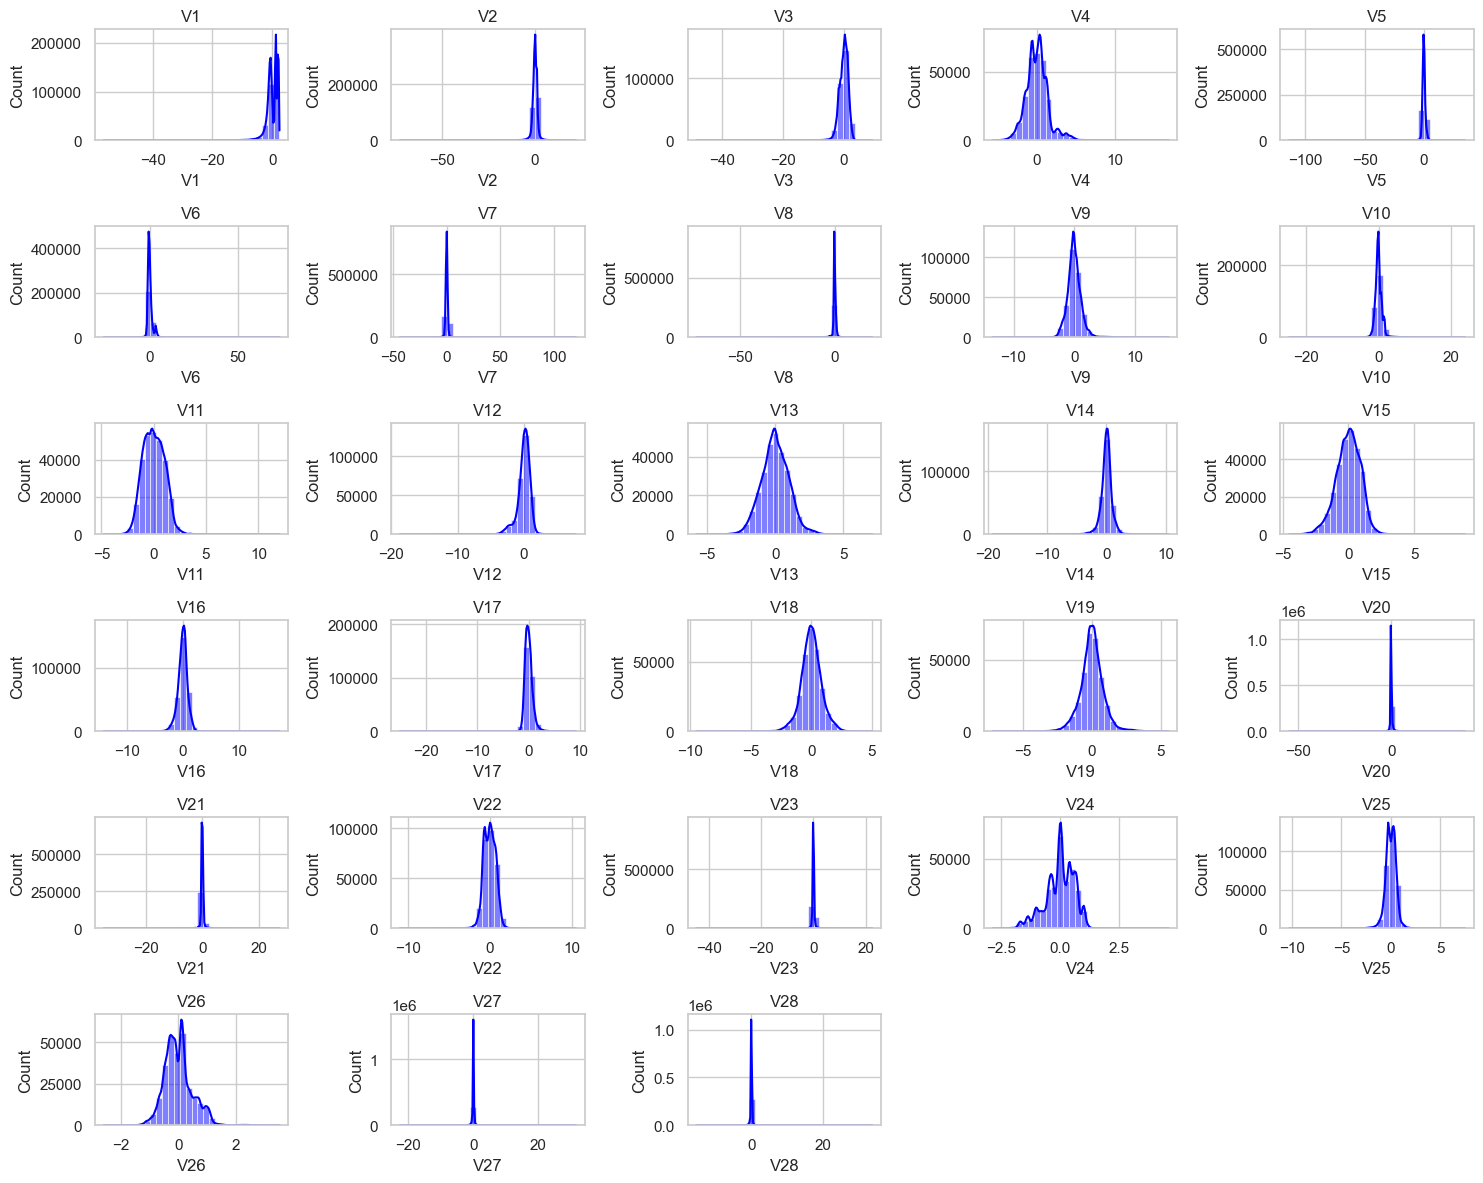

In [40]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(df.columns[1:29], 1):  # Chọn cột từ V1 đến V28
    plt.subplot(6, 5, i)
    sns.histplot(df[feature], bins=30, kde=True, color="blue")
    plt.title(feature)
plt.tight_layout()
plt.show()
